In [1]:
# Importing the libraries

import os
import cv2
import glob
import numpy as np
from time import sleep
import matplotlib.pyplot as plt


import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array

### Predicting the output

We have trained our model with Early stopping point (when the validation loss didn't change for 3 continuous Epochs we stopped the training) and also we reduced the Learning rate on plateau when it didn't change for 3 consecutive Epochs.

Our model didn't perform well here. It predicted most of the data points incorrectly

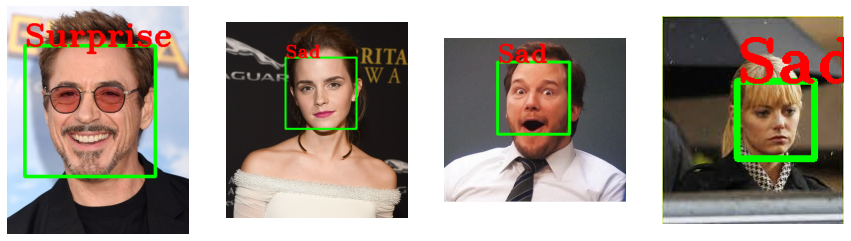

In [2]:
# load the Image and Classifier

classifier =load_model(r"C:\Users\prabhitha.nagarajan\Documents\Projects\Emotion_vgg.h5")
class_labels = ['Angry','Happy','Neutral','Sad','Surprise']

images = [cv2.imread(file) for file in glob.glob(r"C:\Users\prabhitha.nagarajan\Documents\Projects\Multiple Images\*.jpg")]
trained_face_data = cv2.CascadeClassifier(r'C:\Users\prabhitha.nagarajan\Documents\Projects\haarcascade_frontalface_default.xml')

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(len(images)):
    grayscaled_img = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    face_coordinates = trained_face_data.detectMultiScale(grayscaled_img)
    
    for (x,y,w,h) in face_coordinates:
        cv2.rectangle(images[i], (x,y), (x+w,y+h), (0,255,0), 5)
        roi_gray = grayscaled_img[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

        # make a prediction on the ROI, then lookup the class

            preds = classifier.predict(roi)[0]
            label=class_labels[preds.argmax()]
            label_position = (x,y)
            cv2.putText(images[i],label,label_position,cv2.FONT_HERSHEY_TRIPLEX,2,(0,0,255),3)
        else:
            cv2.putText(images[i],'No Face Found',(20,60),cv2.FONT_HERSHEY_TRIPLEX,2,(0,0,255),3)    
        

    # Displaying the image 
    ax[i].axis("off")
    ax[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))

### Fine-tuning the hyper-parameters

Since the above model didn't perform well, we trained the model again by removing the Early stopping point and removing the learning rate reducing parameter.

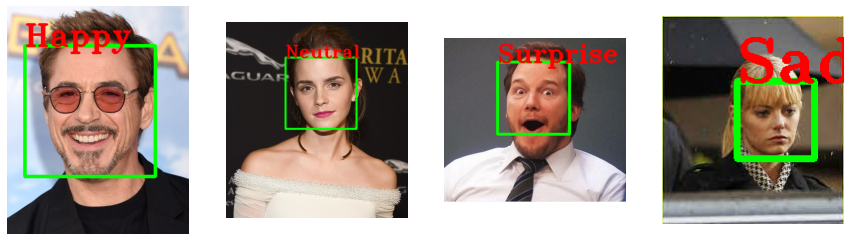

In [3]:
# load the Image and Classifier

classifier =load_model(r"C:\Users\prabhitha.nagarajan\Documents\Projects\Emotion_vgg1.h5")
class_labels = ['Angry','Happy','Neutral','Sad','Surprise']

images = [cv2.imread(file) for file in glob.glob(r"C:\Users\prabhitha.nagarajan\Documents\Projects\Multiple Images\*.jpg")]
trained_face_data = cv2.CascadeClassifier(r'C:\Users\prabhitha.nagarajan\Documents\Projects\haarcascade_frontalface_default.xml')

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(len(images)):
    grayscaled_img = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    face_coordinates = trained_face_data.detectMultiScale(grayscaled_img)
    
    for (x,y,w,h) in face_coordinates:
        cv2.rectangle(images[i], (x,y), (x+w,y+h), (0,255,0), 5)
        roi_gray = grayscaled_img[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

        # make a prediction on the ROI, then lookup the class

            preds = classifier.predict(roi)[0]
            label=class_labels[preds.argmax()]
            label_position = (x,y)
            cv2.putText(images[i],label,label_position,cv2.FONT_HERSHEY_TRIPLEX,2,(0,0,255),3)
        else:
            cv2.putText(images[i],'No Face Found',(20,60),cv2.FONT_HERSHEY_TRIPLEX,2,(0,0,255),3)    
        

    # Displaying the image 
    ax[i].axis("off")
    ax[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))

Here again, we trained the model by removing the Early stopping point but by reducing the learning rate on plateau.

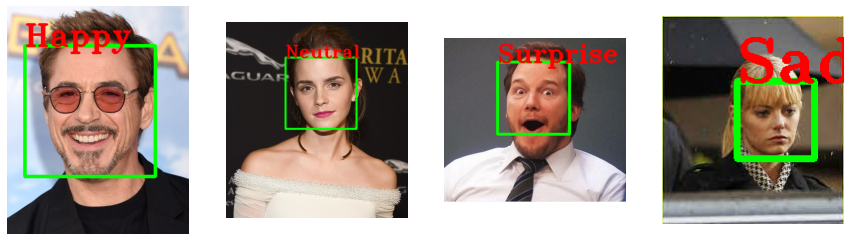

In [4]:
# load the Image and Classifier

classifier =load_model(r"C:\Users\prabhitha.nagarajan\Documents\Projects\Emotion_vgg2.h5")
class_labels = ['Angry','Happy','Neutral','Sad','Surprise']

images = [cv2.imread(file) for file in glob.glob(r"C:\Users\prabhitha.nagarajan\Documents\Projects\Multiple Images\*.jpg")]
trained_face_data = cv2.CascadeClassifier(r'C:\Users\prabhitha.nagarajan\Documents\Projects\haarcascade_frontalface_default.xml')

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(len(images)):
    grayscaled_img = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    face_coordinates = trained_face_data.detectMultiScale(grayscaled_img)
    
    for (x,y,w,h) in face_coordinates:
        cv2.rectangle(images[i], (x,y), (x+w,y+h), (0,255,0), 5)
        roi_gray = grayscaled_img[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

        # make a prediction on the ROI, then lookup the class

            preds = classifier.predict(roi)[0]
            label=class_labels[preds.argmax()]
            label_position = (x,y)
            cv2.putText(images[i],label,label_position,cv2.FONT_HERSHEY_TRIPLEX,2,(0,0,255),3)
        else:
            cv2.putText(images[i],'No Face Found',(20,60),cv2.FONT_HERSHEY_TRIPLEX,2,(0,0,255),3)    
        

    # Displaying the image 
    ax[i].axis("off")
    ax[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))